# CNN WITH VISIBLE IRIS FLOWER CLASSIFICATION

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


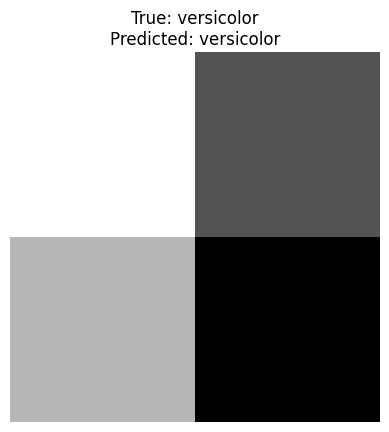

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Normalize features
X = (X - X.min()) / (X.max() - X.min())

# Convert features to 2x2 image
X_img = X.reshape(-1, 2, 2, 1)

# One-hot encode labels
y_cat = to_categorical(y, 3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_img, y_cat, test_size=0.2, random_state=42
)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(16, (2, 2), activation='relu', input_shape=(2, 2, 1)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(X_train, y_train, epochs=40, batch_size=8, verbose=0)

# -----------------------------
# VISUAL IMAGE CLASSIFICATION
# -----------------------------

# Pick one test sample
sample = X_test[0]
true_label = np.argmax(y_test[0])

# Predict class
prediction = model.predict(sample.reshape(1, 2, 2, 1))
predicted_label = np.argmax(prediction)

# Show the "image"
plt.imshow(sample.reshape(2, 2), cmap='gray')
plt.title(
    f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}"
)
plt.axis('off')
plt.show()


# 2×2 image representation of Iris features



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


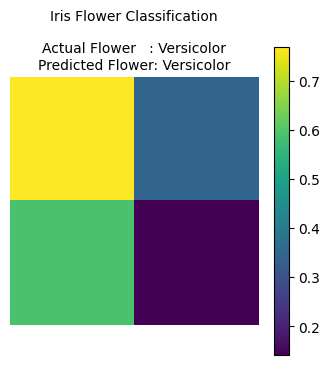

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Normalize features
X = (X - X.min()) / (X.max() - X.min())

# Convert features to 2x2 image
X = X.reshape(-1, 2, 2, 1)

# One-hot encoding
y = to_categorical(y, 3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# CNN Model
model = models.Sequential([
    layers.Conv2D(16, (2, 2), activation='relu', input_shape=(2, 2, 1)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(X_train, y_train, epochs=40, batch_size=8, verbose=0)

# -------------------------
# IRIS FLOWER CLASSIFICATION OUTPUT
# -------------------------

# Select one test sample
sample = X_test[0]
true_label = np.argmax(y_test[0])

# Prediction
prediction = model.predict(sample.reshape(1, 2, 2, 1))
predicted_label = np.argmax(prediction)

# Display feature-image
plt.figure(figsize=(4, 4))
plt.imshow(sample.reshape(2, 2), cmap='viridis')
plt.colorbar()
plt.axis('off')

plt.title(
    f"Iris Flower Classification\n\n"
    f"Actual Flower   : {class_names[true_label].capitalize()}\n"
    f"Predicted Flower: {class_names[predicted_label].capitalize()}",
    fontsize=10
)

plt.show()